In [1]:
import statistics as stat

64


In [2]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
basepath = '/gpfs/scratch/smdick/mixer/'
# paths = ['md_siesta_descr/md_siesta',
#          'md_siesta_mull/md_siesta',
#          'md_siesta_mull_szp/md_siesta',
#          'md_siesta_descr_szp_uncorrected/md_siesta',
#          'mbpol/md_siesta_pure/md_siesta_10',
#          'mbpol/nose_128_10']
paths = ['descr_szp_5/md_siesta',
         'descr_sz_5/md_siesta',
         'mull_szp_5/md_siesta',
         'mull_szp_10/md_siesta',
         '../mbpol/md_siesta_pure/md_siesta_10']
t_equib = 100
dt = 5

In [4]:
r_oh_list = []
for p in paths:
    r_oh_list.append(stat.get_roh(basepath + p, t_equib, dt, dt))


In [5]:
r_oo_list = []
for p in paths:
    r_oo_list.append(stat.get_roo(basepath + p, t_equib, dt, dt))


In [6]:
r_hh_list = []
for p in paths:
    r_hh_list.append(stat.get_rhh(basepath + p, t_equib, dt, dt))


In [7]:
runtimes = []
for p in paths:
    runtimes.append(len(pd.read_csv(basepath + p +'.log', delim_whitespace = True)) / 2000 - t_equib/2000)

In [8]:
runtimes

[0.5705, 0.5045, 0.6659999999999999, 0.3145, 10.854999999999999]

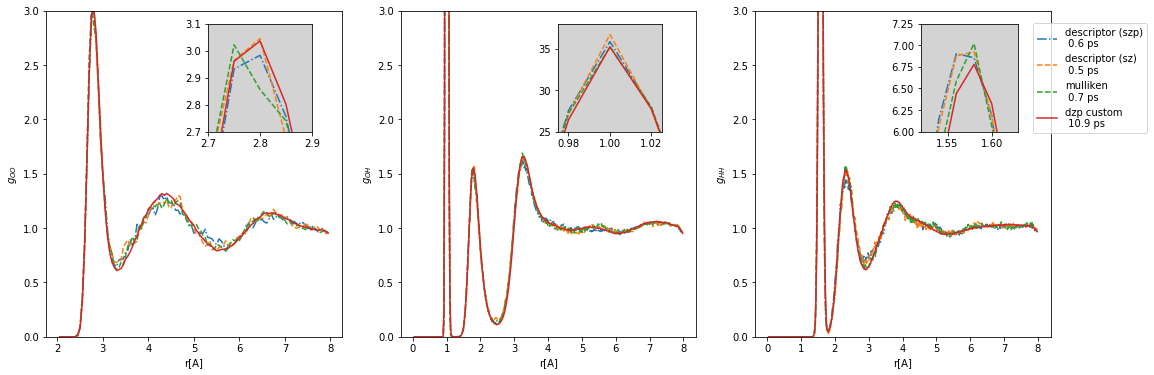

In [13]:
# labels = ['descriptor', 'mulliken', 'mulliken szp', 'szp uncorrected', 'dzp custom uncorrected', 'mbpol']
labels = ['descriptor (szp)', 'descriptor (sz)', 'mulliken', 'mulliken, N = 10', 'dzp custom']
# choice = ['descriptor', 'mulliken', 'mbpol', 'dzp custom uncorrected']
# choice = ['mulliken szp', 'szp uncorrected', 'dzp custom uncorrected']
choice = ['descriptor (szp)', 'descriptor (sz)', 'mulliken', 'dzp custom']
# choice = labels
styles = ['-.','--','--','-', '-','-']
figure(figsize = (18,6))
bins1 = np.arange(2,8,0.05)[1:]
bins2 = np.arange(0,8,0.02)[1:]

a = 0
b = 0
c = 0
axes_list = [a,b,c]
insets = [[.25, .6, .08, .25], [.52, .6, .08, .25],[.8, .6, .075, .25]]
insets_xlims = [[2.7,2.9], [0.975,1.025], [1.52,1.63]]
insets_ylims = [[2.7,3.1], [25,38], [6,7.25]]
for i, [data,bins,div, t, inset, xl, yl] in enumerate(zip([r_oo_list, r_oh_list, r_hh_list],
                                        [bins1,bins2,bins2],
                                        [1,4,2],
                                        ['OO', 'OH', 'HH'],
                                         insets, insets_xlims, insets_ylims)):
    
    subplot(1,3,i+1)
    for r_oo, l, rt, s in zip(data, labels, runtimes, styles):
        if l in choice:
            plot(bins, np.mean(r_oo, axis = 0)/div, label = l +'\n {:.1f} ps'.format(rt), ls = s)
    
    ylim(0,3.0)
#     xlim(1,8)
    xlabel('r[A]')
    ylabel('$g_{' + t + '}$' )
#     legend()
    axes(inset, facecolor = 'lightgray')
#     xticks([])
#     yticks([])
    for r_oo, l, rt, s in zip(data, labels, runtimes, styles):
        if l in choice:
            plot(bins, np.mean(r_oo, axis = 0)/div, label = l +'\n {:.1f} ps'.format(rt), ls = s)
    xlim(*xl)
    ylim(*yl)
legend(bbox_to_anchor=(1.1, 1.05))
savefig('../figs/rdfs_mixer.eps')
savefig('../figs/rdfs_mixer.pdf')